# Classification and Regression Trees (CART)

This notebook demonstrates the main concepts of Classification and Regression Trees (CART) using the `scikit-learn` library. We will:
- Explore the basic structure of CART models.
- Train a decision tree for classification using the `iris` dataset.
- Visualize the decision tree.
- Evaluate the model.


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Step 1: Load and Explore the Dataset

We will use the `iris` dataset, a popular dataset for multi-class classification tasks.

In [2]:
# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Display dataset information
print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")
print(f"Shape of dataset: {X.shape}")

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Shape of dataset: (150, 4)


## Step 2: Split the Data into Training and Testing Sets

We will split the dataset into 70% training and 30% testing data.

In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 105
Testing samples: 45


## Step 3: Train a Decision Tree Classifier

We will train a decision tree using `DecisionTreeClassifier` from `scikit-learn`.

In [12]:
# Train a decision tree classifier
cart_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
cart_clf.fit(X_train, y_train)

# Print training completion
print("Decision tree training completed.")

Decision tree training completed.


## Step 4: Visualize the Decision Tree

We will visualize the decision tree to understand its structure and decision rules.

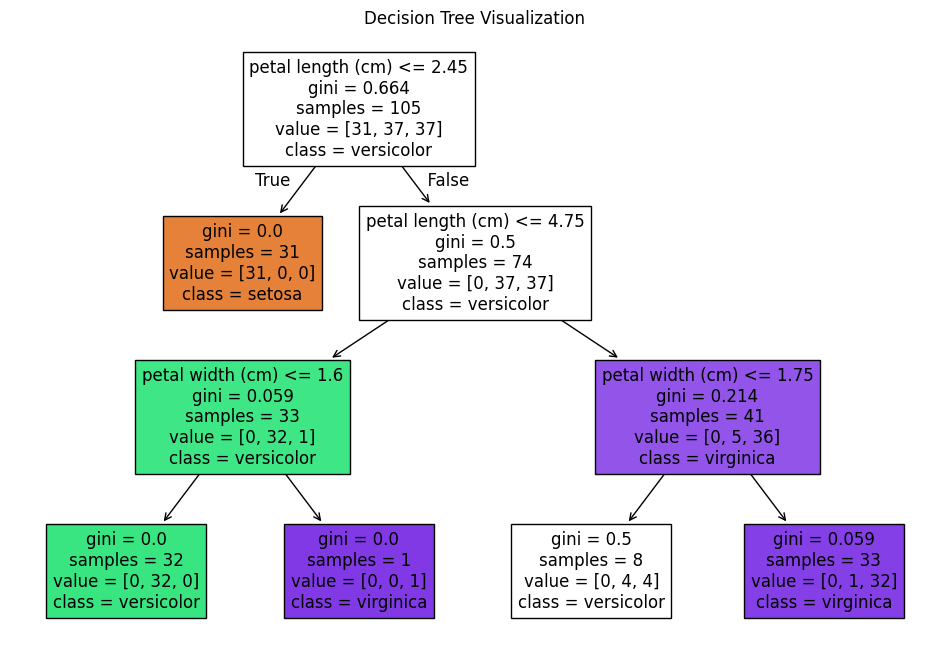

In [13]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(cart_clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

## Step 5: Evaluate the Model

We will evaluate the decision tree using accuracy and a classification report.

In [14]:
# Make predictions on the test set
y_pred = cart_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Step 6: Feature Importance

Decision trees provide feature importance scores, which indicate how much each feature contributes to the splits.

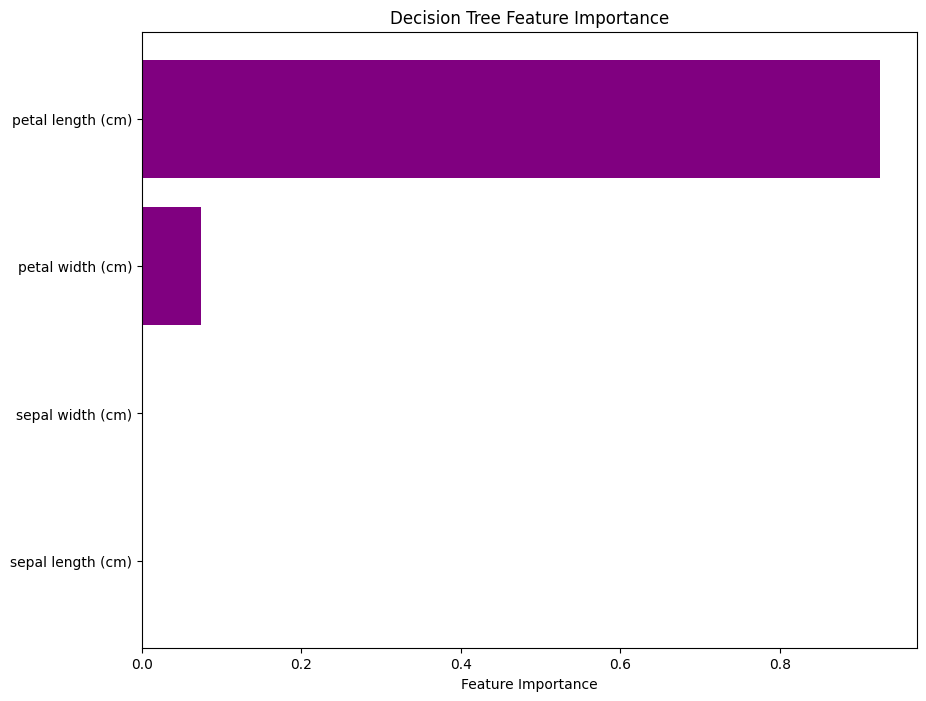

In [15]:
# Plot feature importance
feature_importance = cart_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 8))
plt.barh(np.array(iris.feature_names)[sorted_idx], feature_importance[sorted_idx], color='purple')
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()